<a href="https://colab.research.google.com/github/191919201921/Zadania_Domowe_ADS/blob/main/Kopia_notatnika_M4PD1V1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 4 - Praca domowa - Python

Zwykle istnieje wiele sposobów, żeby rozwiązać zadanie w Python. Także czasami warto spróbować opracować kod na 1-2 sposoby :)

## Zadanie - 1

* Stwórz mapę Twojego miasta. 
* Dodaj na niej punkty z 3 miejscami które najbardziej polecasz do odwiedzenia (np. restauracje, muzea, zoo, plaże itd.). 
* Zapisz mapę z punktami.
* Udostępnij mapę z punktami w grupie na [FB](https://bit.ly/2OSyHaG), podając nazwę miasta!

<img src="https://media.giphy.com/media/26CaL8cNprN6sz5WU/giphy.gif" width="300">

---
Mapę stwórz wykorzystując bibliotekę `folium` a także dla lepszej nawigacji użyj różne ikonki dla punktów, które znajdziesz [TUTAJ...](https://bit.ly/32XsQt8) 

*Wskazówka: Współrzędne geograficzne można pobierać bezpośrednio z [Mapy Google](https://bit.ly/3hEhM8k), klikając prawym przyciskiem i wybierając "Co tu jest?" za czym pojawią się współrzędne miejsca, które zaznaczono.*

In [ ]:
import folium
import pandas as pd

In [ ]:
mapa = folium.Map(location = [50.26305855323006, 19.021954165293778],
                  zoom_start = 13)
mapa.save("katowice.html")

In [ ]:
folium.Marker([50.25897065447083, 19.02207259448237], 
              tooltip='Rynek w Katowicach',
              icon=folium.Icon(icon='home')).add_to(mapa)

folium.Marker([50.265876764010464, 19.02729206017497],
              tooltip = "Spodek- hala",
              icon = folium.Icon(icon='music', icon_color='purple')).add_to(mapa)

folium.Marker([50.27123024982024, 19.005443133309843],
              tooltip = "Centrum Silesia",
              icon = folium.Icon(icon= 'shopping-cart',color = 'red')).add_to(mapa)


In [ ]:
mapa

## Zadanie - 2

Przygotuj swój raport w Power BI. Wykorzystaj do tego zbiór danych o liczbie wydanych nowych praw jazdy w podziale na województwa, wiek i płeć w okresie 1-5.2020 roku. Spróbuj pokazać jak najwięcej informacji z danych bazując na zasadach wizualizacji danych z [Lekcji 2](https://bit.ly/2BIB4tM). Główne pytania na które warto odpowiedzieć:
* W jakim województwie wydano najmniej praw jazdy w okresie `1-5.2020` roku?
* W jakim miesiącu wydano najwięcej praw jazdy kobietom wg. wszystkich województw?
* Jaka jest tendencja liczby wydawanych praw jazdy bazując na danych od poczatku `2020` roku?
* W jakim województwie wydawano najwięcej praw jazdy, ile to `%` od ogólnej liczby? 
> Do zbudowania raportu wykorzystaj zbiorowy zbiór danych zebranych w okresie od stycznia do maja 2020 roku - **[DANE](https://bit.ly/2EBmlSD)**
> *Ten zbiór danych jest informacją publiczną, może być ponownie wykorzystywany bez ograniczeń. [Więcej o źródle danych...](https://bit.ly/33913G1)*

<img src="https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif" width="400">


# Odpowiedzi
1. Najmniej - Województwo opolskie: 1798.
2. W styczniu.
3. Spadkowa.
4. Mazowieckie, 14,55% ogółu wydanych.
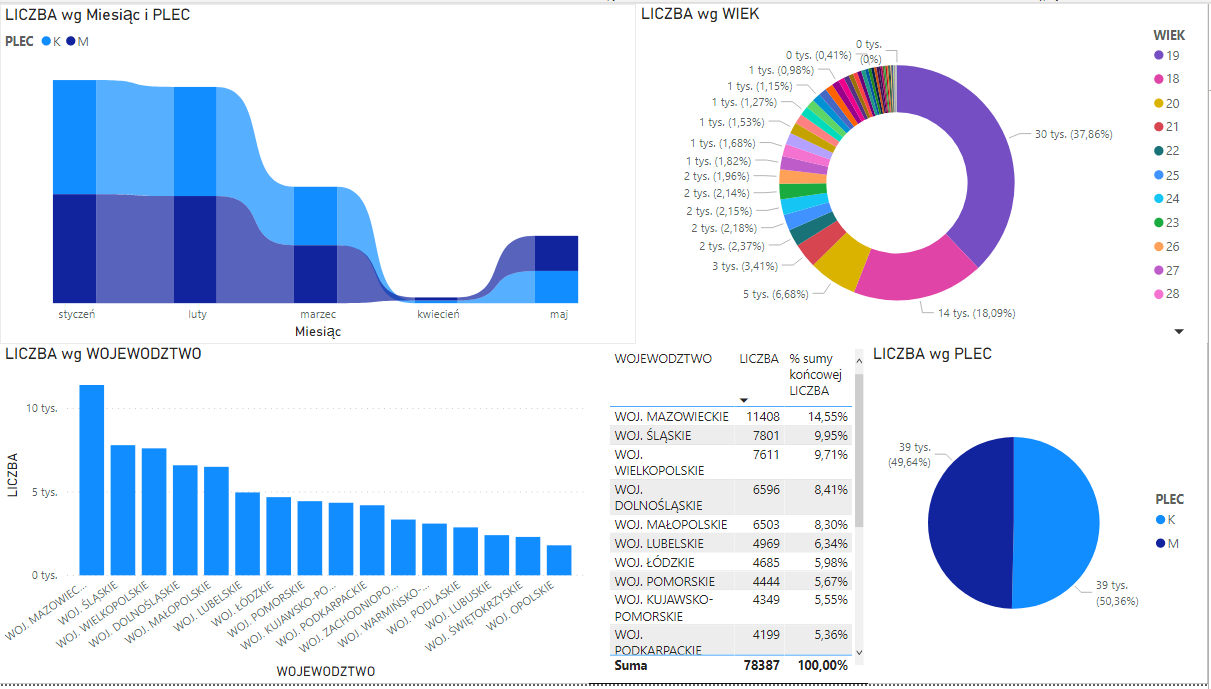



## Zadanie - 3

Przygotój podobne wizualizacje jak w Zadaniu 2 ale wykorzystując do tego `Python`. <br> Staraj się nie kopiować wyglądu wizualizacji a bardziej skupić się na pytaniach, na które próbujesz udzielić odpowiedzi. <br> Po ukończeniu zadania koniecznie podziel się wynikami w grupie na [FB](https://bit.ly/2OSyHaG)! :)<br><br>
> Pamiętaj że separatorem w danych jest `|`

In [ ]:
import pandas as pd
import plotly.express as pl
import plotly.graph_objects as po

In [ ]:
#import danych
#plik usunie się po restarcie - trzeba dodać u siebie do plików
dane = pd.read_csv('/content/sample_data/nowe_prawa_jazdy_wg_plci_i_wieku(1-5.2020).csv',sep = '|',encoding= 'unicode_escape')
dane.head()


,DATA_MC,KOD_WOJ,WOJEWODZTWO,PLEC,WIEK,LICZBA
0,2020-01,2,WOJ. DOLNOL¥SKIE,K,40,15
1,2020-01,2,WOJ. DOLNOL¥SKIE,K,36,22
2,2020-01,2,WOJ. DOLNOL¥SKIE,K,61,1
3,2020-01,2,WOJ. DOLNOL¥SKIE,K,55,4
4,2020-01,2,WOJ. DOLNOL¥SKIE,K,56,2


In [ ]:
print(dane.shape)

(4954, 6)


In [ ]:
dane1 = dane.groupby(["WOJEWODZTWO"])["LICZBA"].sum().reset_index()
dane1.head()

,WOJEWODZTWO,LICZBA
0,WOJ. DOLNOL¥SKIE,6596
1,WOJ. KUJAWSKO-POMORSKIE,4349
2,WOJ. LUBELSKIE,4969
3,WOJ. LUBUSKIE,2408
4,WOJ. MAZOWIECKIE,11408


In [ ]:
liczba_wydanych = pl.bar(
    dane1,
    x = "WOJEWODZTWO",
    y = "LICZBA",
    title = "Liczba wydanych praw jazdy ogółem w Województwach.",
    color = 'LICZBA'
)

liczba_wydanych.show()

In [ ]:
dane2 = dane.groupby(["DATA_MC","PLEC"])["LICZBA"].sum().reset_index()
dane2 = dane2[dane2['PLEC'] == 'K']
dane2.head()

,DATA_MC,PLEC,LICZBA
0,2020-01,K,14227
2,2020-02,K,13600
4,2020-03,K,7297
6,2020-04,K,332
8,2020-05,K,4021


In [ ]:
liczba_kobiety = pl.bar(
    dane2,
    x = "LICZBA",
    y = "DATA_MC",
    color = "LICZBA",
    orientation = "h"
)

liczba_kobiety.show()

In [ ]:
dane3 = dane.groupby(["DATA_MC","PLEC"])["LICZBA"].sum().reset_index()
dane3 = dane3[dane3['PLEC'] == 'M']
dane3.head()

,DATA_MC,PLEC,LICZBA
1,2020-01,M,13584
3,2020-02,M,13355
5,2020-03,M,7216
7,2020-04,M,383
9,2020-05,M,4372


In [ ]:
wykres_plec = po.Figure()

wykres_plec.add_trace(po.Bar(
    x = dane2['DATA_MC'],
    y = dane2['LICZBA'],
    name = 'Kobiety'
))

wykres_plec.add_trace(po.Bar(
    x = dane3['DATA_MC'],
    y = dane3['LICZBA'],
    name = 'Mezczyzni'
))

wykres_plec.update_layout(barmode = 'group', title = 'Wydane paszporty wg. płci')
wykres_plec.show()

In [ ]:
wykres_plec.update_layout(barmode = 'stack', title = 'Wydane paszporty wg. płci')
wykres_plec.show()

In [ ]:
dane1 = dane.groupby(["WOJEWODZTWO"])["LICZBA"].sum().reset_index()
dane1.head()

,WOJEWODZTWO,LICZBA
0,WOJ. DOLNOL¥SKIE,6596
1,WOJ. KUJAWSKO-POMORSKIE,4349
2,WOJ. LUBELSKIE,4969
3,WOJ. LUBUSKIE,2408
4,WOJ. MAZOWIECKIE,11408


In [ ]:
dane1['LICZBA'].sum()

78387

In [ ]:
dane4 = dane1[dane1['WOJEWODZTWO'] == 'WOJ. MAZOWIECKIE']
dane4['LICZBA'].sum()

11408

In [ ]:
dane4['LICZBA'].sum() / dane1['LICZBA'].sum() * 100

14.553433605062063